In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-43.93996463709475 126.95502903656319
-25.151299210002094 152.59354562298148
-55.90934505055623 122.77305877500373
17.467538653897947 -12.660882796761939
-43.41125160843137 127.02883267263985
8.562061360132688 41.18761167245114
12.822900906632725 -124.64413716969031
5.9761718787908364 151.4498500870285
24.616178928495486 -47.481847888734364
59.390571518317614 -101.95421996971307
35.17346310515198 -71.89479380106437
-40.424458426088606 156.7119697030776
-26.167536432596243 -165.18198373311344
27.29352044657125 -19.53494563205504
-44.32985583705774 153.49588578474282
34.70364474302234 77.08368236859764
54.24506641099521 39.75862047963878
-28.92835743225504 -124.71869279761354
-31.241424979818746 -46.755882512286746
-37.48567579778354 28.278527202676315
-79.32046802160905 -31.426877465723436
54.00871312048713 -156.52377427673312
-63.1650448753191 16.034726902231682
48.49854887786205 -171.95997126064398
7.162845543732232 56.122361208851345
-87.91548561116457 -77.79368936099769
15.718773051

-77.36343922492915 15.275645379601315
-8.038943474369717 163.19132935562442
-51.39643115160605 -135.66752964387533
32.9663664223455 114.0766909755074
6.41475575643814 51.01735541398085
-59.70811460788018 -15.688646697487911
17.32594350083643 -65.35276951363237
-72.03971125758792 122.1004375156532
85.51789321540775 -15.803255339531574
-14.73887486133043 -63.088245255234796
69.23648128602719 -107.27668044290701
16.31209387803449 -71.37643234636568
67.96066732244682 -74.54405390936644
-57.53676020515158 114.5623827035929
60.037475177104 -9.582187774451342
-9.45335713205992 -41.848893656158
-69.3227498171201 37.83488012655624
21.80887452206089 -28.730344307463668
-44.935175232821145 -154.0371175453995
-42.74314921581659 158.94515424237034
-85.09771308779264 28.371318382862455
56.86801378427103 -175.65393528256334
-6.1905407017642915 -42.00745053918757
-64.63664126105856 89.750622696211
76.61916060221654 72.69544810701436
-68.60945703630951 71.07716337258958
43.675460777202915 -76.296908912

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 26 of Set 13 | esperance
Processing Record 27 of Set 13 | torquay
Processing Record 28 of Set 13 | albany
Processing Record 29 of Set 13 | bababe
City not found. Skipping...
Processing Record 30 of Set 13 | bedesa
Processing Record 31 of Set 13 | constitucion
Processing Record 32 of Set 13 | kavieng
Processing Record 33 of Set 13 | codrington
Processing Record 34 of Set 13 | flin flon
Processing Record 35 of Set 13 | virginia beach
Processing Record 36 of Set 13 | ulladulla
Processing Record 37 of Set 13 | avarua
Processing Record 38 of Set 13 | los llanos de aridane
Processing Record 39 of Set 13 | hobart
Processing Record 40 of Set 13 | leh
Processing Record 41 of Set 13 | starozhilovo
Processing Record 42 of Set 13 | rikitea
Processing Record 43 of Set 13 | laguna
Processing Record 44 of Set 13 | port alfred
Processing Record 45 of Set 13 | ushuaia
Processing Record 46 of Set 13 | kodiak
Processing Record 47 of Set 13 | bredasdorp
Processing Record 48 of Set 13 | p

Processing Record 38 of Set 16 | torbay
Processing Record 39 of Set 16 | mardin
Processing Record 40 of Set 16 | fare
Processing Record 41 of Set 16 | padang
Processing Record 42 of Set 16 | elblag
Processing Record 43 of Set 16 | saskylakh
Processing Record 44 of Set 16 | roald
Processing Record 45 of Set 16 | mar del plata
Processing Record 46 of Set 16 | yeletskiy
City not found. Skipping...
Processing Record 47 of Set 16 | liberal
Processing Record 48 of Set 16 | port hedland
Processing Record 49 of Set 16 | zheshart
Processing Record 50 of Set 16 | udala
Processing Record 1 of Set 17 | kattivakkam
Processing Record 2 of Set 17 | mega
Processing Record 3 of Set 17 | mandalgovi
Processing Record 4 of Set 17 | tura
Processing Record 5 of Set 17 | agadez
Processing Record 6 of Set 17 | igualada
Processing Record 7 of Set 17 | port elizabeth
Processing Record 8 of Set 17 | rodrigues alves
Processing Record 9 of Set 17 | bereda
Processing Record 10 of Set 17 | brokopondo
Processing Reco

Processing Record 22 of Set 20 | ruthin
Processing Record 23 of Set 20 | gazanjyk
Processing Record 24 of Set 20 | mys shmidta
City not found. Skipping...
Processing Record 25 of Set 20 | mount gambier
Processing Record 26 of Set 20 | basco
Processing Record 27 of Set 20 | pangnirtung
Processing Record 28 of Set 20 | phuket
Processing Record 29 of Set 20 | mitzic
Processing Record 30 of Set 20 | souillac
Processing Record 31 of Set 20 | ostrovnoy
Processing Record 32 of Set 20 | bubaque
Processing Record 33 of Set 20 | altay
Processing Record 34 of Set 20 | beloha
Processing Record 35 of Set 20 | ponta delgada
Processing Record 36 of Set 20 | falealupo
City not found. Skipping...
Processing Record 37 of Set 20 | bilma
Processing Record 38 of Set 20 | yining
Processing Record 39 of Set 20 | sindand
City not found. Skipping...
Processing Record 40 of Set 20 | vao
Processing Record 41 of Set 20 | burica
City not found. Skipping...
Processing Record 42 of Set 20 | mitsamiouli
Processing Re

Processing Record 7 of Set 24 | xuddur
Processing Record 8 of Set 24 | dutlwe
Processing Record 9 of Set 24 | mawlaik
Processing Record 10 of Set 24 | varberg
Processing Record 11 of Set 24 | nevelsk
Processing Record 12 of Set 24 | kirakira
Processing Record 13 of Set 24 | rungata
City not found. Skipping...
Processing Record 14 of Set 24 | puerto narino
Processing Record 15 of Set 24 | bow island
Processing Record 16 of Set 24 | jutai
Processing Record 17 of Set 24 | kure
Processing Record 18 of Set 24 | ukiah
Processing Record 19 of Set 24 | huallanca
Processing Record 20 of Set 24 | rawson
Processing Record 21 of Set 24 | hays
Processing Record 22 of Set 24 | bowen
Processing Record 23 of Set 24 | albanel
Processing Record 24 of Set 24 | naryan-mar
Processing Record 25 of Set 24 | floro
Processing Record 26 of Set 24 | dera bugti
Processing Record 27 of Set 24 | maumere
Processing Record 28 of Set 24 | vagur
Processing Record 29 of Set 24 | okitipupa
Processing Record 30 of Set 24 

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,55.72,60,2,10.85,AU,2022-06-15 15:48:26
1,Torquay,50.4638,-3.5143,74.75,61,48,6.55,GB,2022-06-15 15:48:26
2,Albany,42.6001,-73.9662,80.92,54,47,3.98,US,2022-06-15 15:45:42
3,Bedesa,8.9000,40.7833,71.60,41,55,5.64,ET,2022-06-15 15:48:26
4,Constitucion,-35.3333,-72.4167,56.10,74,3,4.21,CL,2022-06-15 15:48:19
5,Kavieng,-2.5744,150.7967,81.63,77,87,9.40,PG,2022-06-15 15:45:19
6,Codrington,-38.2667,141.9667,55.69,90,96,16.84,AU,2022-06-15 15:48:27
7,Flin Flon,54.7682,-101.8650,57.04,88,75,6.91,CA,2022-06-15 15:47:46
8,Virginia Beach,36.8529,-75.9780,86.05,51,0,4.61,US,2022-06-15 15:48:16
9,Ulladulla,-35.3500,150.4667,54.30,56,40,7.38,AU,2022-06-15 15:48:28


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")b

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

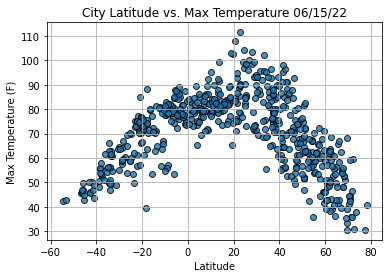

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

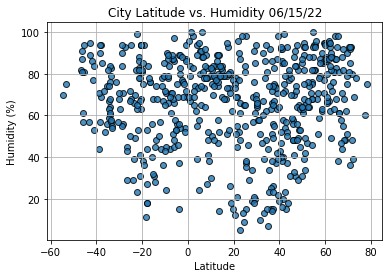

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

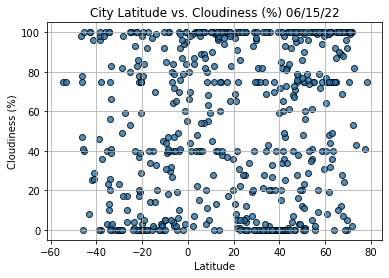

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

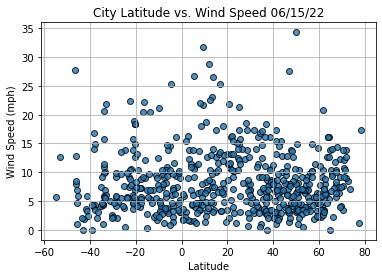

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()